# **Titank Dataset**

## **Task-1 **Pre Prosecution The Dataset****

### First we will Import necessary libraries and Load the

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load the Titanic dataset from Seaborn
titanic_df = pd.read_csv("titanic.csv")

# Display the first 10 rows of the dataset
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print("Number of rows:", titanic_df.shape[0])
print("Number of columns:", titanic_df.shape[1])

Number of rows: 891
Number of columns: 12


In [5]:
print("Columns:", titanic_df.columns.tolist())

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
count = titanic_df.isnull().sum()
count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle missing values

In [8]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


### Drop irrelevant columns

In [9]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Convert categorical variables to numerical

In [11]:
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
titanic_df['Embarked'] = titanic_df['Embarked'].map(embarked_mapping).astype(int)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


In [12]:
# Create a new feature 'FamilySize'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,0,2
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,4
889,1,1,1,26.0,0,0,30.0000,1,1


In [13]:
# Drop unnecessary columns
titanic_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)


### Normalize numerical features using the Z-score formula

In [14]:

titanic_df['Age'] = (titanic_df['Age'] - titanic_df['Age'].mean()) / titanic_df['Age'].std()
titanic_df['Fare'] = (titanic_df['Fare'] - titanic_df['Fare'].mean()) / titanic_df['Fare'].std()
titanic_df

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,-0.565419,-0.502163,0,2
1,1,1,0,0.663488,0.786404,1,2
2,1,3,0,-0.258192,-0.488580,0,1
3,1,1,0,0.433068,0.420494,0,2
4,0,3,1,0.433068,-0.486064,0,1
...,...,...,...,...,...,...,...
886,0,2,1,-0.181385,-0.386454,0,1
887,1,1,0,-0.795839,-0.044356,0,1
888,0,3,0,-0.104579,-0.176164,0,4
889,1,1,1,-0.258192,-0.044356,1,1


## **Data visualizations**

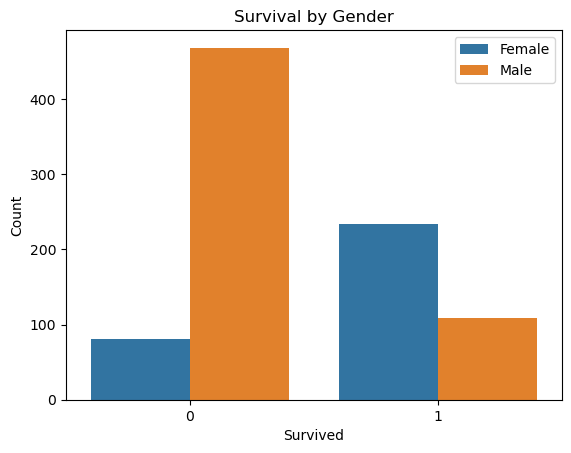

In [15]:

# Create a bar plot to visualize survival by gender
sns.countplot(data=titanic_df, x='Survived', hue='Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Gender')

# Customize the legend labels
plt.legend(['Female', 'Male'])

plt.show()

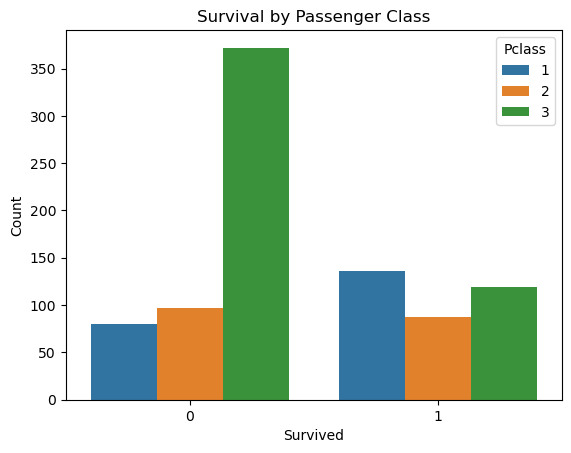

In [16]:
# Create a stacked bar plot to visualize survival by passenger class
sns.countplot(data=titanic_df, x='Survived', hue='Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Passenger Class')
plt.show()


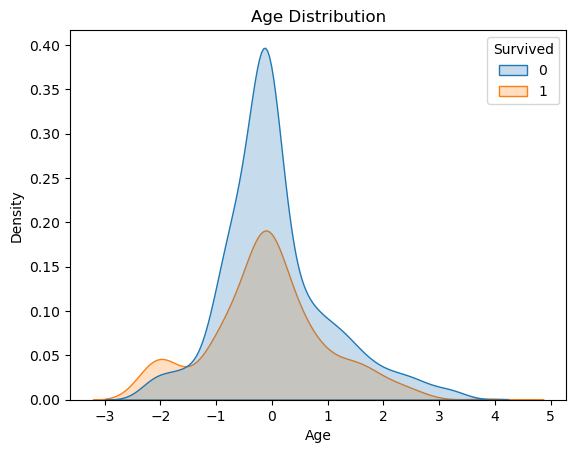

In [17]:
# Create a kernel density plot to visualize the age distribution of passengers
sns.kdeplot(data=titanic_df, x='Age', hue='Survived', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()


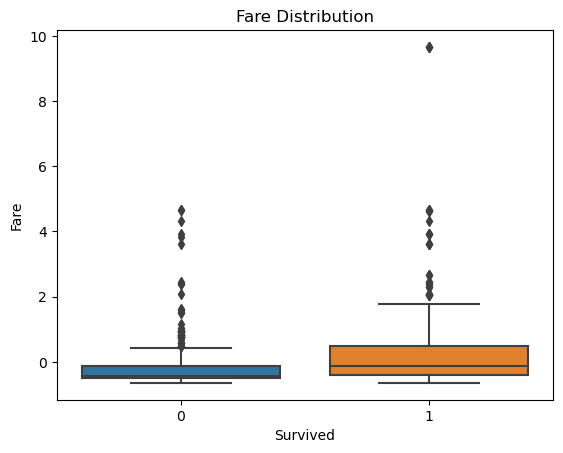

In [18]:
# Create a box plot to visualize the fare distribution of passengers
sns.boxplot(data=titanic_df, x='Survived', y='Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare Distribution')
plt.show()


This plot will display the number of passengers embarked from each port (Cherbourg, Queenstown, Southampton) and differentiate the survivors from non-survivors.

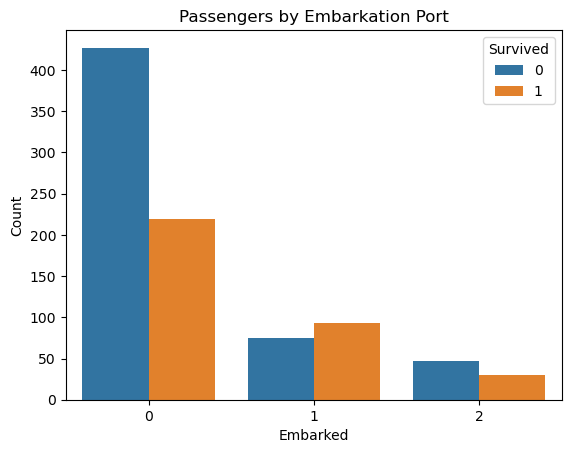

In [19]:
# Create a bar plot to compare the number of passengers embarked from each port
sns.countplot(data=titanic_df, x='Embarked', hue='Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Passengers by Embarkation Port')
plt.show()


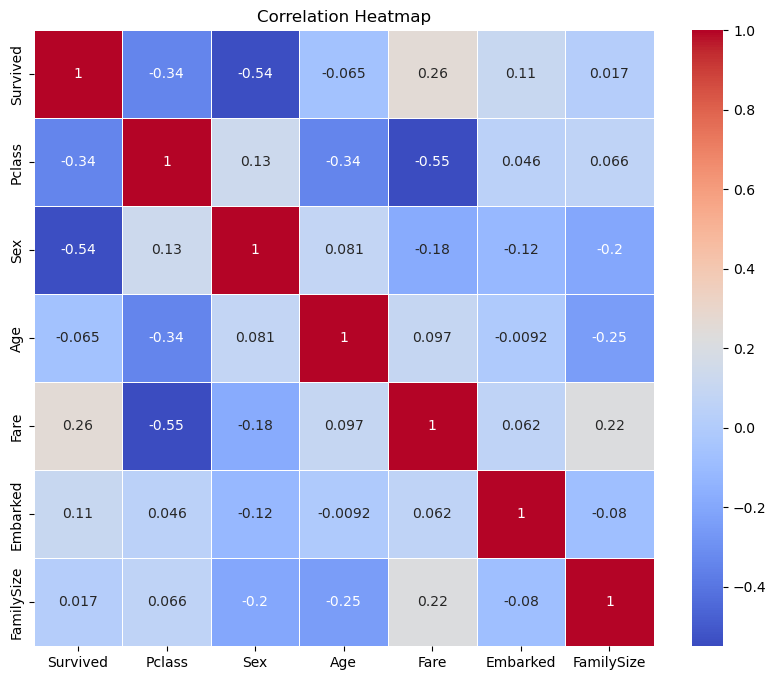

In [20]:
# Compute the correlation matrix
corr = titanic_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

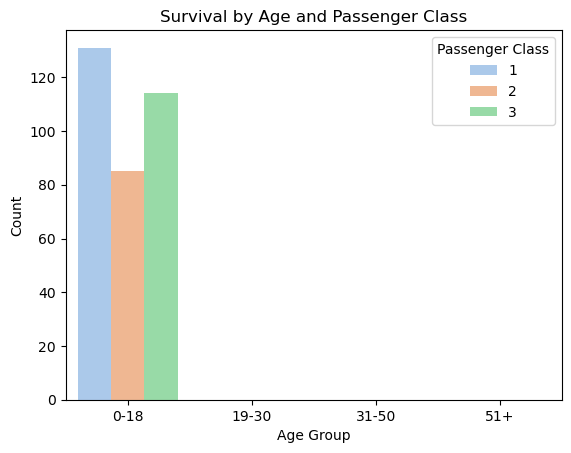

In [21]:
# Create age bins
age_bins = [0, 18, 30, 50, 80]
age_labels = ['0-18', '19-30', '31-50', '51+']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)

# Create a stacked bar plot
sns.countplot(data=titanic_df, x='AgeGroup', hue='Pclass', hue_order=[1, 2, 3], palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival by Age and Passenger Class')
plt.legend(title='Passenger Class', loc='upper right')
plt.show()


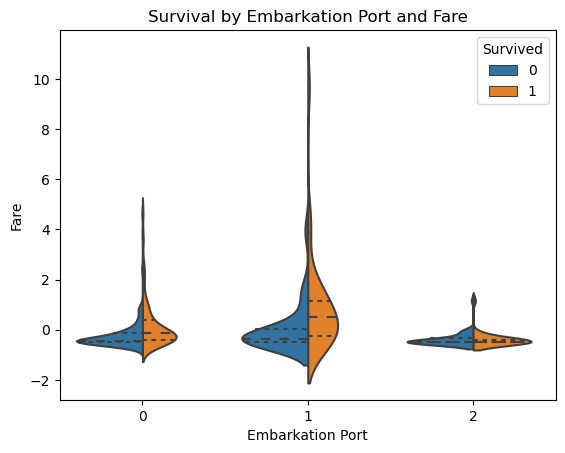

In [22]:
# Create a violin plot
sns.violinplot(data=titanic_df, x='Embarked', y='Fare', hue='Survived', split=True, inner='quartile')
plt.xlabel('Embarkation Port')
plt.ylabel('Fare')
plt.title('Survival by Embarkation Port and Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()


In [23]:
# Split the dataset into features (X) and target (y)


X = titanic_df.drop('Survived', axis=1)

# Perform one-hot encoding on the 'AgeGroup' column
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8212290502793296
